# **MODELLO DI INTELLIGENZA ARTIFICIALE PER IDENTIFICARE PERSONE CON TENDENZE SUICIDE**

In [1642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split

### **IMPORT DEL DATASET**

In [1643]:
db = pd.read_csv("datos_form_suicidi.csv")

**Vista preliminare dei dati**

In [1644]:
db.head(5)

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,Donna,61,Amichevole,No,Nessuno,No,Mai,Si,Sposati,No,Si,No,Si,No,Si,No
1,Uomo,24,Amichevole,No,Nessuno,No,Mai,No,Sposati,No,No,No,No,No,Si,No
2,Donna,39,Timido,No,Nessuno,No,Raramente,Si,Sposati,Si,Si,Si,No,No,No,Si
3,Uomo,30,Timido,No,Nessuno,Si,Raramente,No,Sposati,Si,No,No,No,No,Si,No
4,Uomo,26,Timido,No,Nessuno,Si,Ogni mese,No,Sposati,No,Si,No,No,No,Si,No


**Sostituisco i dati della variabile GENERE**  
1. Donna = 1  
2. Uomo = 0

In [1645]:
db["GENERE"].replace(["Donna", "Uomo"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,Amichevole,No,Nessuno,No,Mai,Si,Sposati,No,Si,No,Si,No,Si,No
1,0,24,Amichevole,No,Nessuno,No,Mai,No,Sposati,No,No,No,No,No,Si,No
2,1,39,Timido,No,Nessuno,No,Raramente,Si,Sposati,Si,Si,Si,No,No,No,Si
3,0,30,Timido,No,Nessuno,Si,Raramente,No,Sposati,Si,No,No,No,No,Si,No
4,0,26,Timido,No,Nessuno,Si,Ogni mese,No,Sposati,No,Si,No,No,No,Si,No


**Sostituisco i dati della variabile PERSONALITA**  
1. Amichevole = 1  
2. Timido = 0


In [1646]:
db["PERSONALITA"].replace(["Amichevole", "Timido"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,No,Nessuno,No,Mai,Si,Sposati,No,Si,No,Si,No,Si,No
1,0,24,1,No,Nessuno,No,Mai,No,Sposati,No,No,No,No,No,Si,No
2,1,39,0,No,Nessuno,No,Raramente,Si,Sposati,Si,Si,Si,No,No,No,Si
3,0,30,0,No,Nessuno,Si,Raramente,No,Sposati,Si,No,No,No,No,Si,No
4,0,26,0,No,Nessuno,Si,Ogni mese,No,Sposati,No,Si,No,No,No,Si,No


**Sostituisco la variabile ALCOL che rappresenta se la persona consume alcol o no**  
1. Si = 1  
2. No = 0

In [1647]:
db["ALCOL"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,No,Nessuno,0,Mai,Si,Sposati,No,Si,No,Si,No,Si,No
1,0,24,1,No,Nessuno,0,Mai,No,Sposati,No,No,No,No,No,Si,No
2,1,39,0,No,Nessuno,0,Raramente,Si,Sposati,Si,Si,Si,No,No,No,Si
3,0,30,0,No,Nessuno,1,Raramente,No,Sposati,Si,No,No,No,No,Si,No
4,0,26,0,No,Nessuno,1,Ogni mese,No,Sposati,No,Si,No,No,No,Si,No


**Sostituisco i dati della variabile FUMATORE che rappresenta se la persona fuma o no**  
1. Si = 1  
2. No = 0

In [1648]:
db["FUMATORE"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,Si,Sposati,No,Si,No,Si,No,Si,No
1,0,24,1,0,Nessuno,0,Mai,No,Sposati,No,No,No,No,No,Si,No
2,1,39,0,0,Nessuno,0,Raramente,Si,Sposati,Si,Si,Si,No,No,No,Si
3,0,30,0,0,Nessuno,1,Raramente,No,Sposati,Si,No,No,No,No,Si,No
4,0,26,0,0,Nessuno,1,Ogni mese,No,Sposati,No,Si,No,No,No,Si,No


**Sostituisco i dati della variabile PROBLEMI che indica se la persona considera che ha dei problemi non banali (o che consideri essi non banali)**  
1. Si = 1  
2. No = 0


In [1649]:
db["PROBLEMI"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,No,Si,No,Si,No,Si,No
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,No,No,No,No,No,Si,No
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,Si,Si,Si,No,No,No,Si
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,Si,No,No,No,No,Si,No
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,No,Si,No,No,No,Si,No


**Sostituisco i dati della variabile RAPPORTO_COPPIA che indica se la persona ha un rapporto affettivo di coppia**  
1. Si = 1  
2. No = 0

In [1650]:
db["RAPPORTO_COPPIA"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,0,Si,No,Si,No,Si,No
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,0,No,No,No,No,Si,No
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,1,Si,Si,No,No,No,Si
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,1,No,No,No,No,Si,No
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,0,Si,No,No,No,Si,No


**Sostituisco i dati della variabile SOLITUDINE che indica se la persona sente in qualche modo si sente sola in modo consapevole**  
1. Si = 1  
2. No = 0

In [1651]:
db["SOLITUDINE"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,0,1,No,Si,No,Si,No
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,0,0,No,No,No,Si,No
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,1,1,Si,No,No,No,Si
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,1,0,No,No,No,Si,No
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,0,1,No,No,No,Si,No


**Sostituisco i dati della variabile INSONNIO che indica se la persona ha problemi per dormire**  
1. Si = 1  
2. No = 0

In [1652]:
db["INSONNIO"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,0,1,0,Si,No,Si,No
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,0,0,0,No,No,Si,No
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,1,1,1,No,No,No,Si
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,1,0,0,No,No,Si,No
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,0,1,0,No,No,Si,No


**Sostituisco i dati della variabile DISTURBI_ALIMENTARI che indica se la persona ha problemi causati della alimentazione**  
1. Si = 1  
2. No = 0

In [1653]:
db["DISTURBI_ALIMENTARI"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,0,1,0,1,No,Si,No
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,0,0,0,0,No,Si,No
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,1,1,1,0,No,No,Si
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,1,0,0,0,No,Si,No
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,0,1,0,0,No,Si,No


**Sostituisco i dati della variabile AUTOLESIONE che indica se la persona causalesioni a se stessa sia in modo fisico che psicologico**  
1. Si = 1  
2. No = 0

In [1654]:
db["AUTOLESIONE"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,0,1,0,1,0,Si,No
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,0,0,0,0,0,Si,No
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,1,1,1,0,0,No,Si
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,1,0,0,0,0,Si,No
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,0,1,0,0,0,Si,No


**Sostituisco i dati della variabile FELICE che indica se la persona si sente felice nel contesto di vita e non in un determinato momento**  
1. Si = 1  
2. No = 0

In [1655]:
db["FELICE"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,0,1,0,1,0,1,No
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,0,0,0,0,0,1,No
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,1,1,1,0,0,0,Si
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,1,0,0,0,0,1,No
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,0,1,0,0,0,1,No


**Sostituisco i dati della variabile MORTE che indica se la persona ha il desiderio o sente che e meglio morire**  
1. Si = 1  
2. No = 0

In [1656]:
db["MORTE"].replace(["Si", "No"], [1, 0], inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,Nessuno,0,Mai,1,Sposati,0,1,0,1,0,1,0
1,0,24,1,0,Nessuno,0,Mai,0,Sposati,0,0,0,0,0,1,0
2,1,39,0,0,Nessuno,0,Raramente,1,Sposati,1,1,1,0,0,0,1
3,0,30,0,0,Nessuno,1,Raramente,0,Sposati,1,0,0,0,0,1,0
4,0,26,0,0,Nessuno,1,Ogni mese,0,Sposati,0,1,0,0,0,1,0


**Sostituisco i dati della variabile CONSUMO_FUMATORE che indica il tipo di prodotto utilizzato**  
1. Nessuno = 0
2. Sigaretta = 1
3. Cannabis = 2
4. Sigaretta elettronica = 3
5. Hashish = 4

In [1657]:
db["CONSUMO_FUMATORE"].replace(
    ["Nessuno", "Tabacco", "Cannabis", "Sigaretta elettronica", "Hashish"],
    [0, 1, 2, 3, 4],
    inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,0,0,Mai,1,Sposati,0,1,0,1,0,1,0
1,0,24,1,0,0,0,Mai,0,Sposati,0,0,0,0,0,1,0
2,1,39,0,0,0,0,Raramente,1,Sposati,1,1,1,0,0,0,1
3,0,30,0,0,0,1,Raramente,0,Sposati,1,0,0,0,0,1,0
4,0,26,0,0,0,1,Ogni mese,0,Sposati,0,1,0,0,0,1,0


**Sostituisco i dati della variabile FREQUENZA_ALCOL che indica con che frequenza una persona bebe alcolici**  
1. Mai = 0
2. Raramente = 1
3. ogni mese = 2
4. ogni settimana = 3
5. ogni giorno = 4

In [1658]:
db["FREQUENZA_ALCOL"].replace(
    ["Mai", "Raramente", "Ogni mese", "Ogni settimana", "Ogni giorno"],
    [0, 1, 2, 3, 4],
    inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,0,0,0,1,Sposati,0,1,0,1,0,1,0
1,0,24,1,0,0,0,0,0,Sposati,0,0,0,0,0,1,0
2,1,39,0,0,0,0,1,1,Sposati,1,1,1,0,0,0,1
3,0,30,0,0,0,1,1,0,Sposati,1,0,0,0,0,1,0
4,0,26,0,0,0,1,2,0,Sposati,0,1,0,0,0,1,0


**Sostituisco i dati della variabile STATO_GENITORI che indica lo stato dei genitori al momento di fare la indagine**  
1. Sposati = 0
2. Separati = 1
3. Divorziati = 2
4. Vedovo = 3
5. Altro = 4

In [1659]:
db["STATO_GENITORI"].replace(
    ["Sposati", "Separati", "Divorziati", "Vedovo", "Altro"],
    [0, 1, 2, 3, 4],
    inplace=True)
db.head()

,GENERE,ETA,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,AUTOLESIONE,FELICE,MORTE
0,1,61,1,0,0,0,0,1,0,0,1,0,1,0,1,0
1,0,24,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,39,0,0,0,0,1,1,0,1,1,1,0,0,0,1
3,0,30,0,0,0,1,1,0,0,1,0,0,0,0,1,0
4,0,26,0,0,0,1,2,0,0,0,1,0,0,0,1,0


**TARGET IDENTIFICATO**  
Si prende in considerazione la variabili AUTOLESIONE 

In [1660]:
db['AUTOLESIONE'].value_counts()

0    170
1     65
Name: AUTOLESIONE, dtype: int64

# Il TARGET sta sbilanciato

Assegno alla variabile "X" tutte le variabili per il train

In [1661]:
x = db.drop(['AUTOLESIONE','ETA','GENERE'],axis=1)
x.head()

,PERSONALITA,FUMATORE,CONSUMO_FUMATORE,ALCOL,FREQUENZA_ALCOL,PROBLEMI,STATO_GENITORI,RAPPORTO_COPPIA,SOLITUDINE,INSONNIO,DISTURBI_ALIMENTARI,FELICE,MORTE
0,1,0,0,0,0,1,0,0,1,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,1,0,1,1,1,0,0,1
3,0,0,0,1,1,0,0,1,0,0,0,1,0
4,0,0,0,1,2,0,0,0,1,0,0,1,0


Un problema che esiste nel dataset è che il target è sbilanciato

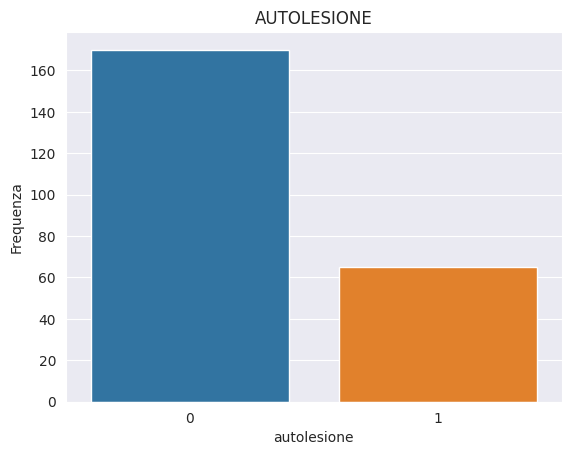

In [1662]:
sns.countplot(x=db['AUTOLESIONE'])
plt.title('AUTOLESIONE')
plt.xlabel('autolesione')
plt.ylabel('Frequenza')
plt.show()



**Boxplot in funzione della variabile ETA**

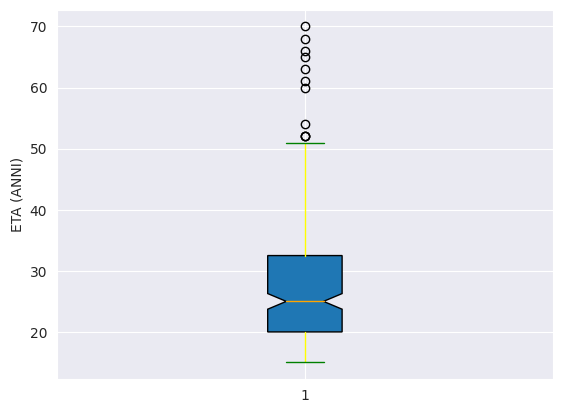

In [1663]:
plt.boxplot([db['ETA']],
            notch=True, patch_artist=True,
            capprops=dict(color="green"),
            medianprops=dict(color="orange"),
            whiskerprops=dict(color="yellow"))
plt.ylabel('ETA (ANNI)')
plt.show()

**Distribuzione in relazione alla variabile dell'età e alla frequenza**

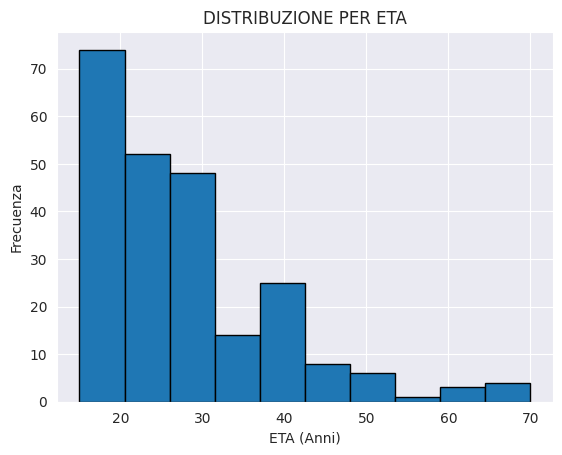

In [1664]:
plt.hist(db['ETA'], bins=10, edgecolor='black')
plt.title("DISTRIBUZIONE PER ETA")
plt.xlabel("ETA (Anni)")
plt.ylabel("Frecuenza")
plt.show()

**DISTRIBUZIONE PER GENERE**

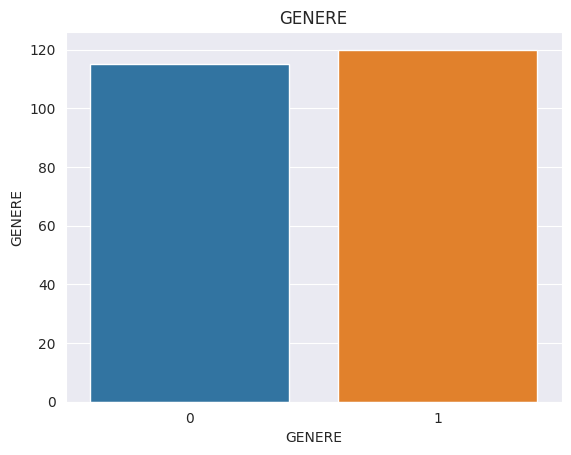

In [1665]:
sns.countplot(x=db['GENERE'])
plt.title('GENERE')
plt.xlabel('GENERE')
plt.ylabel('GENERE')
plt.show()

In [1666]:
y = db['AUTOLESIONE']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: AUTOLESIONE, dtype: int64

# **ALGORITMO SMOTE**

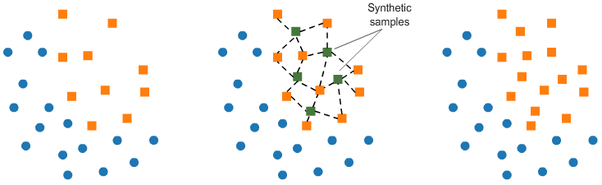

**Bilancia le informazioni in base al target utilizzando l'algoritmo smothe (creando variabili "sintetiche")**

In [1667]:
X_resampled, y_resampled = SMOTE().fit_resample(x, y)

**Target bilanciato in base alla variabile 'AUTOLESIONE'.**

{0: 170, 1: 170}


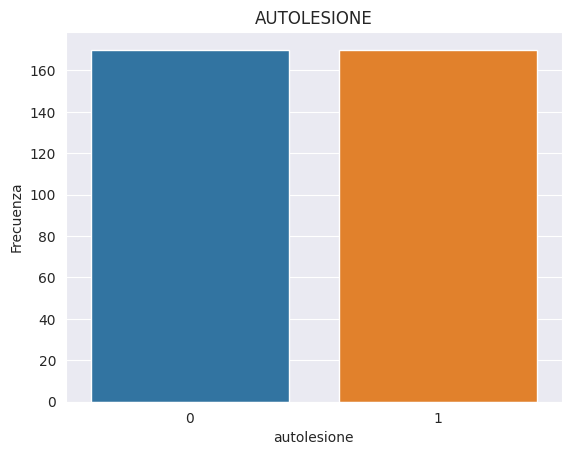

In [1668]:
unique,count=np.unique(y_resampled,return_counts=True)
countClase={k:v for (k,v) in zip(unique,count)}
print(countClase)
sns.countplot(x=y_resampled)
plt.title('AUTOLESIONE')
plt.xlabel('autolesione')
plt.ylabel('Frecuenza')
plt.show()

**Divido la informazione del dataset, 70% per il train e 30% per il test**

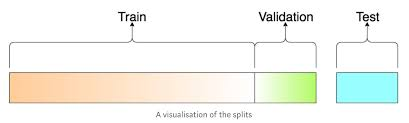

In [1669]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30)

# **ANALISI DEL MODELLO**


In [1670]:
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz

1.   Naive Bayes



In [1671]:
def NaiveBayes(X_train, X_test, y_train, y_test) :  #No tiene buen ajuste Accuracy < 0.80
      clf1 = GaussianNB()
      clf1 = clf1.fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      print("Accuracy Naive Bayes :",metrics.accuracy_score(y_test, y_pred))
      print("recall Naive Bayes :",metrics.recall_score(y_test,y_pred))
      print(confusion_matrix(y_test, y_pred))
      return y_pred

2.   Desicion Tree  


In [1672]:
def DesicionTree(X_train, X_test, y_train, y_test) :  #No tiene buen ajuste, Accuracy < 0.80
      clf1 = DecisionTreeClassifier(criterion = "gini", splitter = "random", 
                                    max_depth = 7, min_samples_split = 5, 
                                    min_samples_leaf = 2, max_features = 2 ) 
      clf1 = clf1.fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      print("Accuracy Decision Tree :",metrics.accuracy_score(y_test, y_pred))
      print("recall Decision Tree:",metrics.recall_score(y_test, y_pred))
      print(confusion_matrix(y_test, y_pred))
      return y_pred

3.   Random Forest


In [1673]:
def RandomForest(X_train, X_test, y_train, y_test) : #El que mejor se ajusta, podemos utilizar esto
      clf=RandomForestClassifier(n_estimators = 150, max_depth = 11, 
                                 random_state = 10, criterion = 'gini')
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      print("Accuracy Random Forest :",metrics.accuracy_score(y_test, y_pred))
      print("recall Random Forest :",metrics.recall_score(y_test,y_pred))
      print(confusion_matrix(y_test, y_pred))
      return y_pred

4.   SVM (Support Vector Machine)

In [1674]:
def SVM(X_train, X_test, y_train, y_test) :
    clf = svm.SVC(kernel = 'linear') #Linear Kernel (Sigmoid no, poly 81 - 88, rbf 83 - 86, linear 80 - 82)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy SVM :",metrics.accuracy_score(y_test, y_pred))
    print("recall SVM :",metrics.recall_score(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    return y_pred

### **RISULTATI DEGLI ALGORITMI UTILIZZATI**

In [1675]:
ypredNaiveBayes= NaiveBayes(X_train, X_test, y_train, y_test)

ypredTree = DesicionTree(X_train, X_test, y_train, y_test)

ypredRandom = RandomForest(X_train, X_test, y_train, y_test)

ypredSVM = SVM(X_train, X_test, y_train, y_test)

Accuracy Naive Bayes : 0.7058823529411765
recall Naive Bayes : 0.6530612244897959
[[40 13]
 [17 32]]
Accuracy Decision Tree : 0.6862745098039216
recall Decision Tree: 0.6326530612244898
[[39 14]
 [18 31]]
Accuracy Random Forest : 0.7450980392156863
recall Random Forest : 0.8571428571428571
[[34 19]
 [ 7 42]]
Accuracy SVM : 0.7254901960784313
recall SVM : 0.7959183673469388
[[35 18]
 [10 39]]


**MATRICE DI CONFUSIONE PER IL DESICION TREE**

In [1676]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

confusion_matrix(y_test,ypredTree)
pd.crosstab(y_test, ypredTree, rownames = ['Attuale'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Attuale,,,
0,39,14,53
1,18,31,49
All,57,45,102


**MATRICE DI CONFUSIONE PER IL RANDOM FOREST**

In [1677]:
confusion_matrix(y_test,ypredRandom)
pd.crosstab(y_test, ypredRandom, rownames = ['Attuale'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Attuale,,,
0,34,19,53
1,7,42,49
All,41,61,102


**MATRICE DI CONFUSIONE PER SVM**

In [1678]:
confusion_matrix(y_test,ypredSVM)
pd.crosstab(y_test, ypredSVM, rownames = ['Attuale'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Attuale,,,
0,35,18,53
1,10,39,49
All,45,57,102


**MATRICE DI CONFUSIONE PER NAIVE BAYES**

In [1679]:
confusion_matrix(y_test,ypredNaiveBayes)
pd.crosstab(y_test, ypredSVM, rownames = ['Attuale'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Attuale,,,
0,35,18,53
1,10,39,49
All,45,57,102


**Report delle metriche del Desicion Tree**

In [1680]:
print(classification_report(y_test, ypredArbol))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47        53
           1       0.48      0.57      0.52        49

    accuracy                           0.50       102
   macro avg       0.50      0.50      0.50       102
weighted avg       0.50      0.50      0.50       102



**Report delle metriche del Random Forest**

In [1681]:
print(classification_report(y_test, ypredRandom))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72        53
           1       0.69      0.86      0.76        49

    accuracy                           0.75       102
   macro avg       0.76      0.75      0.74       102
weighted avg       0.76      0.75      0.74       102



**Report delle metriche del SVM**

In [1682]:
print(classification_report(y_test, ypredSVM))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        53
           1       0.68      0.80      0.74        49

    accuracy                           0.73       102
   macro avg       0.73      0.73      0.73       102
weighted avg       0.73      0.73      0.72       102



**Report delle metriche di Naive Bayes**

In [1683]:
print(classification_report(y_test, ypredNaiveBayes))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73        53
           1       0.71      0.65      0.68        49

    accuracy                           0.71       102
   macro avg       0.71      0.70      0.70       102
weighted avg       0.71      0.71      0.70       102



**ANALISI DELLA MATRICE DI CONFUSIONE DEL RANDOM FOREST**

<Axes: >

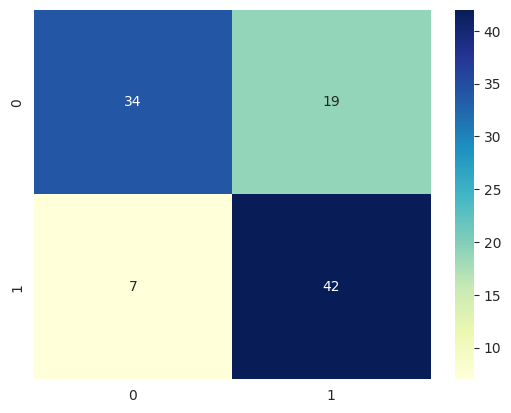

In [1684]:
sns.heatmap(confusion_matrix(y_test,ypredRandom), annot=True, cmap='YlGnBu')

**METRICHE DELLA CURVA ROC DEL RANDOM FOREST**

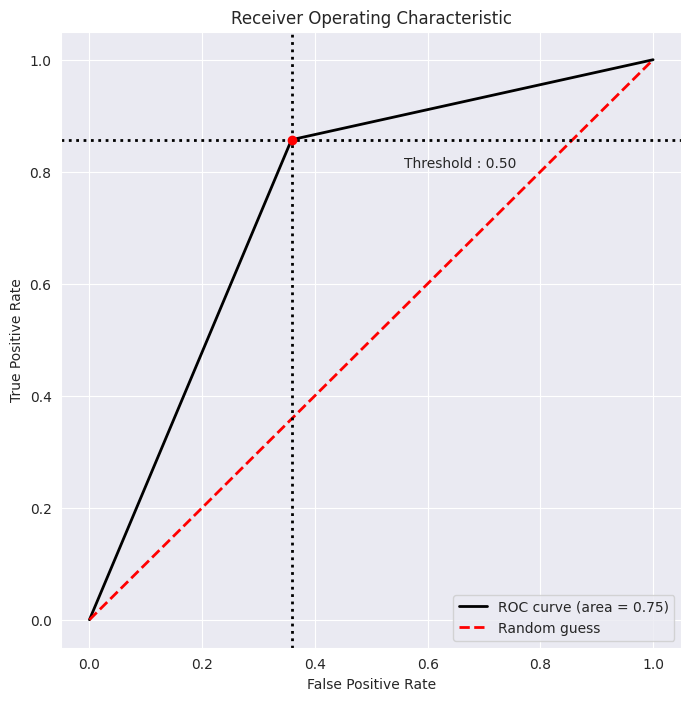

In [1685]:
clf=RandomForestClassifier(n_estimators = 150, max_depth = 11,random_state = 10, criterion = 'gini')
clf.fit(X_train,y_train)
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, ypredRandom, labels=["SI", "NO"])

plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

**Creazione di un test per valutare la tendenza suicida di una persona**

In [1686]:

"""
num_array = list()
for i in range(16):
    if i==1:
      print('¿Qual'e e il tuo genere? \n Donna : 1  Uomo : 0')
      n = input()
    if i==2:
      print("¿Qual'e la tua eta? ")
      n = input()
    if i==3:
      print("¿Come ti consideri? \n Amichevole = 1 Timido = 0")
      n = input()
      num_array.append(int(n))
    if i==4:
      print("¿Fumi attualmente? \n Si = 1 No = 0")
      n = input()
      num_array.append(int(n))
    if i==5:
      print("¿Cosa fumi? \n Niente = 0 - Tabacco = 1 - Cannabis = 2 - Sigaretta elettronica = 3 - Hashish = 4")
      n = input()
      num_array.append(int(n))
    if i==6:
      print("¿Bevi alcolici? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
    if i==7:
      print("¿cuanto spesso bevi alcolici? \n Mai = 0 - Raramente = 1 - Ogmi mese = 2 - Ogni settimana = 3 - Ogni giorno = 4")
      n = input()
      num_array.append(int(n))
    if i==8:
      print("¿Pensi di avere problemi in familia o altro? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
    if i==9:
      print("I tuoi genitori sono \n Sposati = 0 - Separati = 1 - Divorziati = 2 - Vedovo = 3 - Altro = 4")
      n = input()
      num_array.append(int(n))
    if i==10:
      print("Sei fidanzato? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
    if i==11:
      print("¿Ti senti solo? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
    if i==12:
      print("¿Sofri insonnio? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
    if i==13:
      print("¿Credi di avere un disturbo alimentario? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
    if i==14:
      print("Sei felice? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
    if i==15:
      print("¿A volte senti il desiderio di stare morto? \n Si = 1 No = 0 ")
      n = input()
      num_array.append(int(n))
"""



'\nnum_array = list()\nfor i in range(16):\n    if i==1:\n      print(\'¿Qual\'e e il tuo genere? \n Donna : 1  Uomo : 0\')\n      n = input()\n    if i==2:\n      print("¿Qual\'e la tua eta? ")\n      n = input()\n    if i==3:\n      print("¿Come ti consideri? \n Amichevole = 1 Timido = 0")\n      n = input()\n      num_array.append(int(n))\n    if i==4:\n      print("¿Fumi attualmente? \n Si = 1 No = 0")\n      n = input()\n      num_array.append(int(n))\n    if i==5:\n      print("¿Cosa fumi? \n Niente = 0 - Tabacco = 1 - Cannabis = 2 - Sigaretta elettronica = 3 - Hashish = 4")\n      n = input()\n      num_array.append(int(n))\n    if i==6:\n      print("¿Bevi alcolici? \n Si = 1 No = 0 ")\n      n = input()\n      num_array.append(int(n))\n    if i==7:\n      print("¿cuanto spesso bevi alcolici? \n Mai = 0 - Raramente = 1 - Ogmi mese = 2 - Ogni settimana = 3 - Ogni giorno = 4")\n      n = input()\n      num_array.append(int(n))\n    if i==8:\n      print("¿Pensi di avere problemi 

**Creazione di una lista per simulare un test realizzato**

In [1687]:
num_array = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
print(num_array)

[1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]


**RISULTATO DELLA PREDIZIONE**

In [1688]:
clf=RandomForestClassifier(n_estimators = 150, max_depth = 11,random_state = 10, criterion = 'gini')
clf.fit(X_train,y_train)

y_pred1=clf.predict([num_array])

if  y_pred1==1:
  print("SUICIDIO")
else:
  print("NO SUICIDIO")

NO SUICIDIO


/home/adx/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1689]:
prob=float(clf.predict_proba([num_array])[:,1])
print(f"Probabilita di suicidio = {prob*100}%")

Probabilita di suicidio = 7.000000000000001%


/home/adx/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
